<a href="https://colab.research.google.com/github/Isasanri97/Trips_project/blob/main/LimpiazaVisualizacion_Sanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

**Optimizando la Logística de los Ingenios Azucareros: Análisis de Datos GPS en el Valle del Cauca y Cauca**

**Objetivo de la propuesta**: El objetivo de este proyecto es mejorar la eficiencia de la logística en los ingenios azucareros del Valle del Cauca y Cauca mediante el análisis de datos obtenidos a través de sistemas de monitoreo con GPS. Utilizando esta información, se planea realizar un análisis que permitiráa a las areas encargadas identificar puntos de origen y destino de los vehículos, optimizar la distribución de vehículos en las zonas de corte o siembra, establecer horarios para la recolección de productos y prever los tiempos de llegada a la planta de producción. Además, se podrán llevar a cabo estudios sobre la disponibilidad de vehículos, los tiempos de desplazamiento y los requerimientos de mantenimiento.

# Cargue de datos

Para llevar a cabo este análisis, se utilizarán datos del conjunto "Delivery truck trips data" disponible en la plataforma Kaggle, que incluye información relevante como ubicación precisa, números de identificación de vehículos y puntos de inicio y fin de los desplazamientos.

Link Dataset Delivery truck trips data:
https://www.kaggle.com/datasets/ramakrishnanthiyagu/delivery-truck-trips-data

Por favor ingresa a tu cuenta Kaggle y siga estos pasos:
1. Vaya a su cuenta, desplácese a la sección API y haga clic en **Expire API Token** para eliminar tokens anteriores.

2. Haga clic en **Create New API Token**: descargará el archivo kaggle.json en su máquina.

3. Vaya a su archivo de proyecto de Google Colab y ejecute este comando si no tiene ingtalado kaggle en su colab:

! pip install -q kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"issabellasanchez","key":"97055e2540a6cd10f6f1effa594f30a9"}'}

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
! kaggle datasets download -d ramakrishnanthiyagu/delivery-truck-trips-data

 62% 1.00M/1.61M [00:00<00:00, 2.00MB/s]
100% 1.61M/1.61M [00:00<00:00, 2.90MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('delivery-truck-trips-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd
import numpy as np
df=pd.read_excel('Delivery truck trip data.xlsx')

<ipython-input-5-e86078985b2f>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df=pd.read_excel('Delivery truck trip data.xlsx')


# Revision de datos Total Data Inicial: 220160


In [6]:
total_datos = df.size
print(total_datos)

220160


In [7]:
df.columns.tolist()

['GpsProvider',
 'BookingID',
 'Market/Regular ',
 'BookingID_Date',
 'vehicle_no',
 'Origin_Location',
 'Destination_Location',
 'Org_lat_lon',
 'Des_lat_lon',
 'Data_Ping_time',
 'Planned_ETA',
 'Current_Location',
 'DestinationLocation',
 'actual_eta',
 'Curr_lat',
 'Curr_lon',
 'ontime',
 'delay',
 'OriginLocation_Code',
 'DestinationLocation_Code',
 'trip_start_date',
 'trip_end_date',
 'TRANSPORTATION_DISTANCE_IN_KM',
 'vehicleType',
 'Minimum_kms_to_be_covered_in_a_day',
 'Driver_Name',
 'Driver_MobileNo',
 'customerID',
 'customerNameCode',
 'supplierID',
 'supplierNameCode',
 'Material Shipped']

Se detecta datos complementarios en columnas ontime y delay. Se comprueba por medio de la suma y comparaicon de datos nulos en cada columna

In [8]:
porontimenull=df['ontime'].isnull().sum()/(df['ontime'].count()+df['ontime'].isnull().sum())
porontime=df['ontime'].count()/(df['ontime'].count()+df['ontime'].isnull().sum())
pordelaynull=df['delay'].isnull().sum()/(df['delay'].count()+df['delay'].isnull().sum())
pordelay=df['delay'].count()/(df['delay'].count()+df['delay'].isnull().sum())
print('porcentaje de nulos en ontime %s' % round(porontimenull*100,0))
print('porcentaje de no nulos en ontime %s'% round(porontime*100,0))
print('porcentaje de nulos en delay %s'% round(pordelaynull*100,0))
print('porcentaje de no nulos en delay %s'% round(pordelay*100,0))

porcentaje de nulos en ontime 63.0
porcentaje de no nulos en ontime 37.0
porcentaje de nulos en delay 37.0
porcentaje de no nulos en delay 63.0


Se determina los datos que son utiles para el presente analisis, se eliminan las columnas que no aportaran informacion necesaria a este estudio

In [9]:
df1=df.drop(columns=df.columns[24:32])
df2=df1.drop(columns=['GpsProvider','Market/Regular ','Data_Ping_time','DestinationLocation','BookingID_Date','Org_lat_lon','Des_lat_lon','Curr_lat','Curr_lon','vehicleType','delay','Current_Location','trip_end_date'])
df2.columns.tolist()

['BookingID',
 'vehicle_no',
 'Origin_Location',
 'Destination_Location',
 'Planned_ETA',
 'actual_eta',
 'ontime',
 'OriginLocation_Code',
 'DestinationLocation_Code',
 'trip_start_date',
 'TRANSPORTATION_DISTANCE_IN_KM']

Se explora la cantidad de datos nullos en cada columna y el tipo de datos presenta para determinar su eliminacion o reemplazo en el dataframe

In [10]:
df2.isnull().sum()

BookingID                           0
vehicle_no                          0
Origin_Location                     0
Destination_Location                0
Planned_ETA                         0
actual_eta                         37
ontime                           4332
OriginLocation_Code                 3
DestinationLocation_Code           27
trip_start_date                     0
TRANSPORTATION_DISTANCE_IN_KM     712
dtype: int64

In [11]:
print(df2.dtypes)

BookingID                                object
vehicle_no                               object
Origin_Location                          object
Destination_Location                     object
Planned_ETA                      datetime64[ns]
actual_eta                       datetime64[ns]
ontime                                   object
OriginLocation_Code                      object
DestinationLocation_Code                 object
trip_start_date                  datetime64[ns]
TRANSPORTATION_DISTANCE_IN_KM           float64
dtype: object


# Limpieza de datos Total Data Final:74943

En la columna ontime se cambia los datos null por la palabra delay y los datos G (los cuales corresponden a los datos de trips que llegaron on time) por la palabra ontime, eliminando asi los datos null de la columna

In [12]:
df2['ontime']=df2['ontime'].replace('G','ontime')
df2['ontime']=df2['ontime'].replace(np.nan, 'delay')
print(df2['ontime'])

0        delay
1       ontime
2       ontime
3       ontime
4       ontime
         ...  
6875    ontime
6876    ontime
6877    ontime
6878     delay
6879    ontime
Name: ontime, Length: 6880, dtype: object


In [13]:
df2.isnull().sum()

BookingID                          0
vehicle_no                         0
Origin_Location                    0
Destination_Location               0
Planned_ETA                        0
actual_eta                        37
ontime                             0
OriginLocation_Code                3
DestinationLocation_Code          27
trip_start_date                    0
TRANSPORTATION_DISTANCE_IN_KM    712
dtype: int64

Al haber fallos en la señal del GPS en algunas ocasiones, la columna numerica TRANSPORTATION_DISTANCE_IN_KM presenta datos nulos, estos se remplazan por el numero 0
Se eliminan las filas en las cuales quedan datos null puesto que no es posible reemplazar estos con datos complementarios, son el resultado de fallas en el GPS

In [14]:
df2['TRANSPORTATION_DISTANCE_IN_KM']=df2['TRANSPORTATION_DISTANCE_IN_KM'].replace(np.nan,0)
df2.dropna(inplace=True)
df2.isnull().sum()

BookingID                        0
vehicle_no                       0
Origin_Location                  0
Destination_Location             0
Planned_ETA                      0
actual_eta                       0
ontime                           0
OriginLocation_Code              0
DestinationLocation_Code         0
trip_start_date                  0
TRANSPORTATION_DISTANCE_IN_KM    0
dtype: int64

Se obtiene el total de datos con el cual se realizara el estudio

In [15]:
total_datos = df2.size
print(total_datos)

74943


# Visualizaciones

In [16]:
import matplotlib.pyplot as plt

0        delay
1       ontime
2       ontime
3       ontime
4       ontime
         ...  
6875    ontime
6876    ontime
6877    ontime
6878     delay
6879    ontime
Name: ontime, Length: 6813, dtype: object
        DestinationLocation_Code
ontime                          
delay                       4275
ontime                      2538


<Figure size 500x500 with 0 Axes>

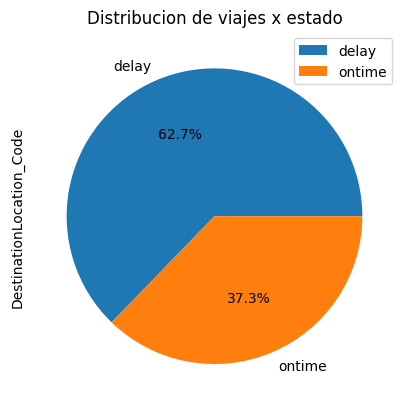

In [17]:
print(df2['ontime'])
result3 = df2.groupby(['ontime']).aggregate({'DestinationLocation_Code':'count'})
print(result3)

plt.figure(figsize=(5, 5))
result3.plot.pie(subplots=True,autopct='%1.1f%%')
plt.title('Distribucion de viajes x estado')
plt.show()

Se realiza un un grafico para visualizar el procentaje de retraso o cumplimiento de hora, en el total de viajes registrados hasta el momento. Se puede evidenciar que mas de la mitad de los viajes realizados no cumplieron con el hora de llegada estimada o pactada.

   trip_month  trip_month_number  DestinationLocation_Code
0       April                  4                       274
1      August                  8                      1662
2    December                 12                       527
3    February                  2                        68
4     January                  1                       358
5        July                  7                      1034
6        June                  6                       678
7       March                  3                       308
8         May                  5                       432
9    November                 11                       639
10    October                 10                       528
11  September                  9                       305


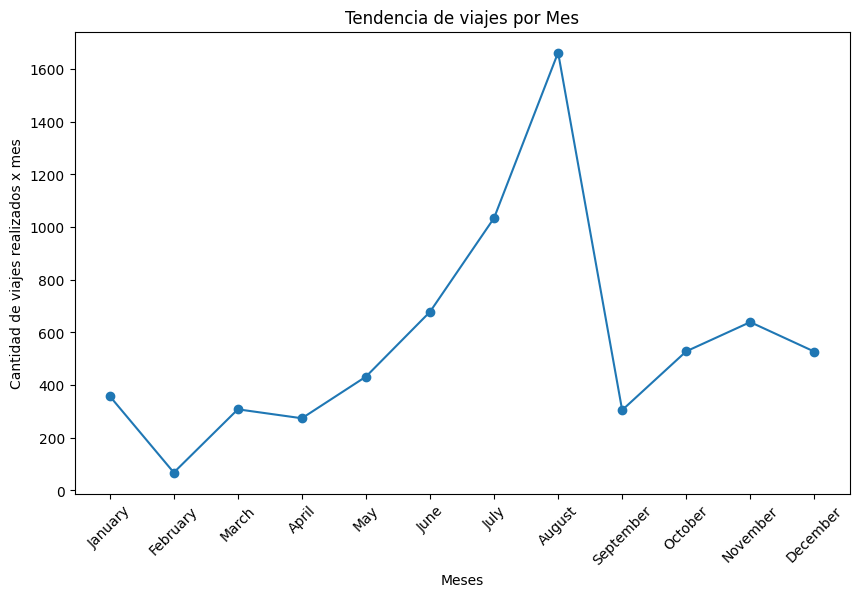

In [18]:
df2['trip_month']=df2['trip_start_date'].dt.strftime('%B')
df2['trip_month_number']=df2['trip_start_date'].dt.month

study=df2.groupby(['trip_month','trip_month_number']).aggregate({'DestinationLocation_Code':'count'})
study.reset_index(inplace=True)
sort_month = study.sort_values('trip_month_number',ascending=True)
print(study)

plt.figure(figsize=(10, 6))
plt.plot(sort_month['trip_month'],  sort_month['DestinationLocation_Code'], marker='o', linestyle='-')

# Configurar etiquetas y título
plt.xlabel("Meses")
plt.ylabel("Cantidad de viajes realizados x mes")
plt.title("Tendencia de viajes por Mes")

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

Se procede a realizar un grafico de lineas para analizar la cantidad de viajes realizados durante el año, para identificar asi el mes en el cual se relaiza la mayor cantidad de viajes; esto permite tener una perspectiva visual de los meses en los cuales hay mayor cosecha de caña

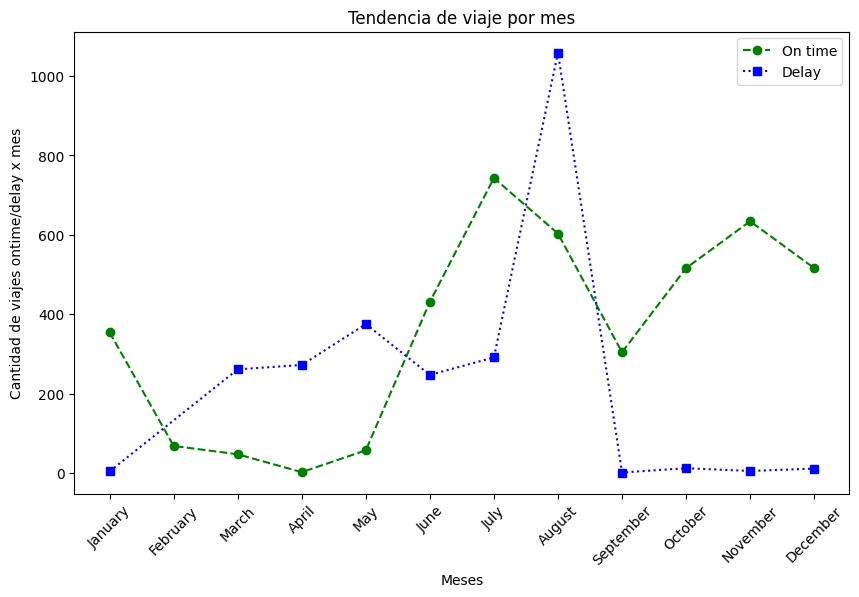

In [19]:
newdf = df2[(df2.ontime == "delay")]
#print(len(newdf['ontime']))
study2=newdf.groupby(['trip_month','trip_month_number']).aggregate({'ontime':'count'})
study2.reset_index(inplace=True)
sort_month2 = study2.sort_values('trip_month_number',ascending=True)

newdf2 = df2[(df2.ontime == "ontime")]
#print(len(newdf2['ontime']))
study3=newdf2.groupby(['trip_month','trip_month_number']).aggregate({'ontime':'count'})
study3.reset_index(inplace=True)
sort_month3 = study3.sort_values('trip_month_number',ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(sort_month2['trip_month'], sort_month2['ontime'], "o--g" )
plt.plot(sort_month3['trip_month'], sort_month3['ontime'], "s:b" )
plt.xlabel("Meses")
plt.ylabel("Cantidad de viajes ontime/delay x mes")
plt.title("Tendencia de viaje por mes")
plt.legend(["On time", "Delay"])
plt.xticks(rotation=45)
plt.show()

Se crea un gráfico de líneas que compara las llegadas a tiempo con las llegadas retrasadas para cada uno de los meses, se evidencia que los meses con el mayor numero de viajes concuerda con los meses en los cuales hubo mas llegadas retrasadas, indicando la posibilidad de mejora en la logistica de transporte del producto cuando hay un pico de produccion

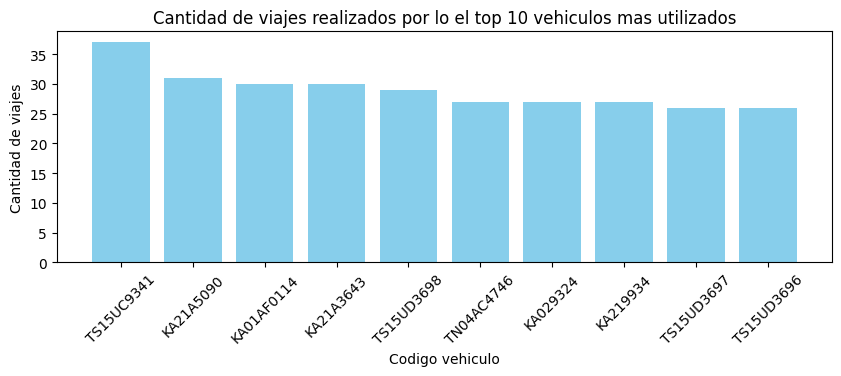

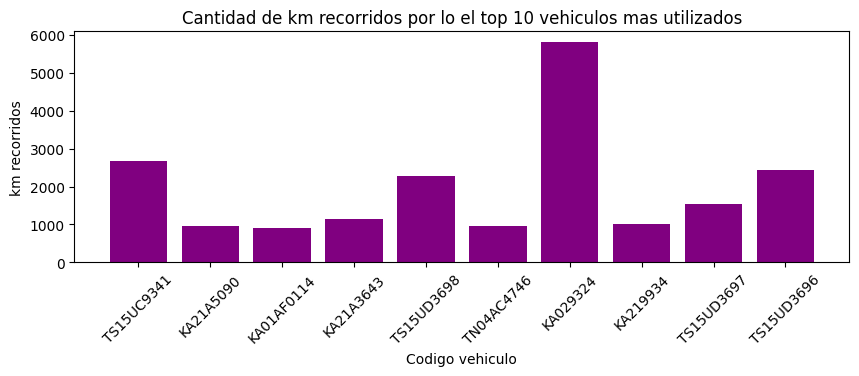

In [20]:
result = df2.groupby(['vehicle_no']).aggregate({'TRANSPORTATION_DISTANCE_IN_KM':'sum','DestinationLocation_Code':'count'})
result.reset_index(inplace=True)
top_10_resultados = result.sort_values('DestinationLocation_Code',ascending=False).head(10)

plt.figure(figsize=(10, 3))
plt.bar(top_10_resultados['vehicle_no'], top_10_resultados['DestinationLocation_Code'], color='skyblue')
plt.title('Cantidad de viajes realizados por lo el top 10 vehiculos mas utilizados')
plt.xlabel('Codigo vehiculo')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 3))
plt.bar(top_10_resultados['vehicle_no'], top_10_resultados['TRANSPORTATION_DISTANCE_IN_KM'], color='purple')
plt.title('Cantidad de km recorridos por lo el top 10 vehiculos mas utilizados')
plt.xlabel('Codigo vehiculo')
plt.ylabel('km recorridos')
plt.xticks(rotation=45)
plt.show()

Se realizan dos graficos de barras con el objetivo de analizar la eficiencia de los diez vehículos más utilizados. Al compararlos, es evidente que el vehículo que realiza la mayor cantidad de viajes no recorre tramos muy largos, ya que su kilometraje es significativamente menor en comparación con los otros vehículos del top.

   vehicle_no  Total_trips  Total_ontime  KPI_Puntualidad  Total_KM
0  TS15UC9341           37           6.0        16.216216    2671.0
1   KA21A5090           31          11.0        35.483871     972.9
2  KA01AF0114           30          10.0        33.333333     906.1
3   KA21A3643           30          12.0        40.000000    1140.6
4  TS15UD3698           29           5.0        17.241379    2272.1
5  TN04AC4746           27          11.0        40.740741     947.6
6    KA029324           27          25.0        92.592593    5805.0
7    KA219934           27           9.0        33.333333    1004.6
8  TS15UD3697           26           1.0         3.846154    1551.0
9  TS15UD3696           26           1.0         3.846154    2425.2


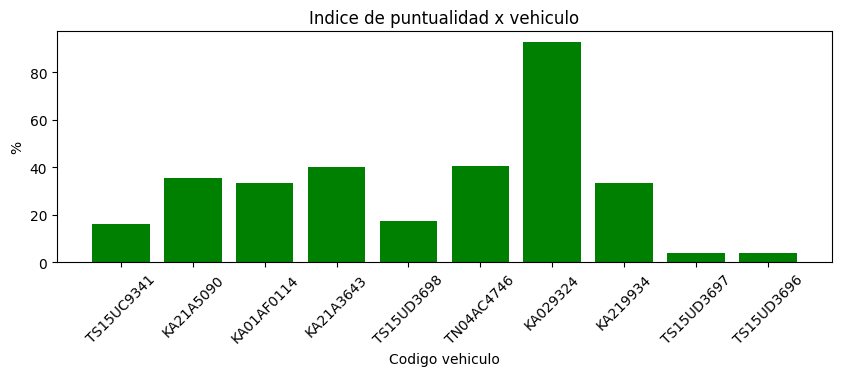

In [21]:
result2 = df2.groupby(['vehicle_no']).aggregate({'DestinationLocation_Code':'count'})
result2.reset_index(inplace=True)
# top_10_resultados1 = result2.sort_values('vehicle_no',ascending=True)
# print(top_10_resultados1)
newdf3 = df2[(df2.ontime == "ontime")]
# print(newdf3)
result3 = newdf3.groupby(['vehicle_no']).aggregate({'DestinationLocation_Code':'count'})
result3.reset_index(inplace=True)
result4 = pd.merge(result2, result3, on='vehicle_no', how='left')
result4['DestinationLocation_Code_y']=result4['DestinationLocation_Code_y'].replace(np.nan, 0)
result4['KPI_Puntualidad']=(result4['DestinationLocation_Code_y']/result4['DestinationLocation_Code_x'])*100
result4_top_10=result4.sort_values('DestinationLocation_Code_x',ascending=False).head(10)
result5 = pd.merge(result4_top_10, top_10_resultados, on='vehicle_no', how='left')
result5.drop(columns='DestinationLocation_Code',inplace=True)
result5.rename(columns = {'DestinationLocation_Code_x':'Total_trips', 'DestinationLocation_Code_y':'Total_ontime','TRANSPORTATION_DISTANCE_IN_KM':'Total_KM'}, inplace = True)
print(result5)

plt.figure(figsize=(10, 3))
plt.bar(result5['vehicle_no'], result5['KPI_Puntualidad'], color='green')
plt.title('Indice de puntualidad x vehiculo')
plt.xlabel('Codigo vehiculo')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.show()

Por ultimo se grafica el ultimo KPI de efeciciencia, correspondiente el porcentaje de viajes que llegan a la hora pactada, con el fin de comparar con los graficos anteriores. En estos se puede ver que el vehiculo KA029324 perteneciente al top 10 de vehiculos con mas viajes, tambien es quien realiza la mayor cantidad de km recorridos y tiene mayor eficiencia en sus tiempos de entrega de prodcuto. Esto podria dar indicaciones del estado del vehiculo, rutas que sigue y los conductores que lo manejan.

# Exportacion de datos


Una vez nuestros datos han sido limpiados y se ha demostrado su utilidad para complir el objeitvos se procede a descargarlos en formato CSV, para que estos puedan ser utilizados y/o manipulados desde diferentes plataformas para nuevos estudios de diferentes areas.


In [24]:
from google.colab import drive
trips_data = '/content/drive/My Drive/trips_data.csv'
# Guarda el DataFrame como CSV en Google Drive
df2.to_csv(trips_data, index=False)

En nuestro caso queremos hacer uso de esta informaicon en una base de datos en otro archivo colab, por lo cual guardamos el archivo CSV en nuestro drive. Asegurese de tener conexion con su Drive y que la ruta este correcta para poder usar el comando anteior.